In [1]:
#https://ieeexplore.ieee.org/document/10549889

In [2]:
!pip install openpyxl ssqueezepy pyt

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.2/127.2 kB 11.8 MB/s eta 0:00:00
  Created wheel for pyt: filename=pyt-1.0.5-py3-none-any.whl size=16716 sha256=200f5d91b7dc51e13ad9d82b54191bb5ac1c4b4e3bc3f802ce90c2c38cbdc3cb
  Stored in directory: /home/work/.cache/pip/wheels/79/44/3a/ec16180c30a94673c22d6e12f30ae7f64bd1319df5395edd56
Successfully built pyt


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

2025-01-19 12:06:57.879357: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-19 12:06:57.879456: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-19 12:06:57.879489: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-19 12:06:57.888484: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
import keras.models
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
df = pd.read_csv('mhealth_full.csv')
df

,acc_ch_x,acc_ch_y,acc_ch_z,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,gyr_la_z,mag_la_x,...,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity,subject
0,-9.8184,0.009971,0.29563,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-0.370000,...,-4.5781,0.187760,-0.449020,-1.01030,0.034483,-2.35000,-1.610200,-0.030899,0,subject1
1,-9.8489,0.524040,0.37348,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-0.197990,...,-4.3198,0.023595,-0.449020,-1.01030,0.034483,-2.16320,-0.882540,0.326570,0,subject1
2,-9.6602,0.181850,0.43742,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-0.374170,...,-4.2772,0.275720,-0.449020,-1.01030,0.034483,-1.61750,-0.165620,-0.030693,0,subject1
3,-9.6507,0.214220,0.24033,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-0.017271,...,-4.3163,0.367520,-0.456860,-1.00820,0.025862,-1.07710,0.006945,-0.382620,0,subject1
4,-9.7030,0.303890,0.31156,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-0.374390,...,-4.1459,0.407290,-0.456860,-1.00820,0.025862,-0.53684,0.175900,-1.095500,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,-9.2476,-0.248070,-2.62230,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-0.687640,...,-8.9071,0.294230,0.041176,-0.99384,-0.480600,2.40890,7.496100,7.915500,0,subject10
1215741,-9.4632,-0.073513,-2.11190,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-0.868190,...,-8.7455,0.448140,0.041176,-0.99384,-0.480600,1.69450,7.866000,7.897500,0,subject10
1215742,-9.4011,-0.144580,-3.02350,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-0.868410,...,-9.1155,0.450480,0.041176,-0.99384,-0.480600,1.15770,8.052800,7.884900,0,subject10
1215743,-9.3732,-0.026252,-2.70760,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-0.339790,...,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0.27441,9.487900,5.325800,0,subject10


In [6]:
df.columns

Index(['acc_ch_x', 'acc_ch_y', 'acc_ch_z', 'acc_la_x', 'acc_la_y', 'acc_la_z',
       'gyr_la_x', 'gyr_la_y', 'gyr_la_z', 'mag_la_x', 'mag_la_y', 'mag_la_z',
       'acc_rw_x', 'acc_rw_y', 'acc_rw_z', 'gyr_rw_x', 'gyr_rw_y', 'gyr_rw_z',
       'mag_rw_x', 'mag_rw_y', 'mag_rw_z', 'activity', 'subject'],
      dtype='object')

- 0: 'Null',
- 1: 'Standing still',
- 2: 'Sitting and relaxing',
- 3: 'Lying down',
- 4: 'Walking',
- 5: 'Climbing stairs',
- 6: 'Waist bends forward',
- 7: 'Frontal elevation of arms',
- 8: 'Knees bending (crouching)',
- 9: 'Cycling',
- 10: 'Jogging',
- 11: 'Running',
- 12: 'Jump front & back'

In [7]:
df_activity_1 = df[df['activity'] == 1]
df_activity_2 = df[df['activity'] == 2]
df_activity_3 = df[df['activity'] == 3]

In [8]:
df = pd.concat([df_activity_1, df_activity_2, df_activity_3])
df

,acc_ch_x,acc_ch_y,acc_ch_z,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,gyr_la_z,mag_la_x,...,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity,subject
6656,-9.7788,0.55690,1.19750,2.6493,-9.45170,0.37683,-0.20965,-0.88931,-0.508840,0.563660,...,-9.061800,1.817700,-0.058824,-0.93429,-0.34483,0.355370,-0.370030,-0.350200,1,subject1
6657,-9.7733,0.27880,0.73036,2.4157,-9.53060,0.40179,-0.20965,-0.88931,-0.508840,0.568100,...,-9.204800,1.518900,-0.058824,-0.93429,-0.34483,0.719910,0.178030,0.373630,1,subject1
6658,-9.8609,0.11561,0.79988,2.3865,-9.59910,0.48141,-0.20037,-0.86867,-0.506880,0.211100,...,-9.194500,1.550700,-0.058824,-0.93429,-0.34483,0.355370,-0.370030,-0.350200,1,subject1
6659,-9.7409,0.17652,0.88957,2.3758,-9.59970,0.42919,-0.20037,-0.86867,-0.506880,0.215650,...,-9.174600,1.541300,-0.078431,-0.93429,-0.34052,0.357180,-0.188580,-0.351980,1,subject1
6660,-9.7821,0.21637,0.90368,2.3239,-9.54060,0.40038,-0.20037,-0.86867,-0.506880,0.568100,...,-9.203900,1.612700,-0.078431,-0.93429,-0.34052,-0.001887,-0.188670,-0.720170,1,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160444,-1.8433,-6.82380,6.79640,7.6194,0.41876,6.23250,0.54917,0.34334,-0.060904,0.374440,...,0.201870,0.187180,-0.731370,0.43737,0.45259,0.355370,-0.370030,-0.350200,3,subject10
1160445,-2.0935,-6.43390,6.95780,7.5368,0.49779,6.21480,0.54917,0.34334,-0.060904,0.189390,...,0.191760,0.176250,-0.725490,0.45380,0.44181,0.355330,-0.373640,-0.711180,3,subject10
1160446,-1.9369,-6.69250,6.70290,7.4847,0.62677,6.24160,0.54917,0.34334,-0.060904,0.193770,...,0.379670,-0.033100,-0.725490,0.45380,0.44181,0.179480,-0.005369,-0.357370,3,subject10
1160447,-1.7959,-6.66930,6.54710,7.4828,0.42480,5.84610,0.54917,0.34334,-0.060904,0.193770,...,0.380400,0.039853,-0.725490,0.45380,0.44181,0.368100,0.903740,-0.001675,3,subject10


In [9]:
df.activity.value_counts()

1    30720
2    30720
3    30720
Name: activity, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['activity']=le.fit_transform(df['activity'])

In [11]:
df= df.drop(['subject'], axis=1)

In [12]:
X = df.drop(['activity'], axis=1)
y = df['activity']

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X)
scaled_X['activity'] = y.values

scaled_X

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,activity
0,-0.761306,0.977441,-0.401482,0.208931,-0.686651,-0.688153,-0.769381,-0.960800,-1.444216,0.775578,...,0.374638,-0.987474,-0.625071,0.271858,-1.238500,-1.720993,0.015799,-0.637366,0.234524,0
1,-0.760136,0.841550,-0.506555,0.097296,-0.703340,-0.682037,-0.769381,-0.960800,-1.444216,0.785014,...,0.332671,-1.013775,-0.726532,0.271858,-1.238500,-1.720993,0.711717,-0.144592,1.134824,0
2,-0.778758,0.761808,-0.490918,0.083342,-0.717829,-0.662528,-0.749561,-0.927329,-1.440073,0.026325,...,0.363220,-1.011880,-0.715734,0.271858,-1.238500,-1.720993,0.015799,-0.637366,0.234524,0
3,-0.753249,0.791571,-0.470744,0.078228,-0.717956,-0.675323,-0.749561,-0.927329,-1.440073,0.035995,...,0.352027,-1.008220,-0.718926,0.237007,-1.238500,-1.711057,0.019254,-0.474220,0.232310,0
4,-0.762007,0.811044,-0.467570,0.053426,-0.705455,-0.682382,-0.749561,-0.927329,-1.440073,0.785014,...,0.359938,-1.013609,-0.694681,0.237007,-1.238500,-1.711057,-0.666216,-0.474301,-0.225645,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92155,0.925558,-2.629093,0.857875,2.584088,1.401169,0.746650,0.851333,1.038147,-0.497360,0.373452,...,-1.556437,0.716327,-1.178732,-0.923594,0.956188,0.117269,0.015799,-0.637366,0.234524,2
92156,0.872372,-2.438571,0.894179,2.544614,1.417886,0.742313,0.851333,1.038147,-0.497360,-0.019812,...,-1.511440,0.714468,-1.182444,-0.913143,0.982476,0.092418,0.015722,-0.640611,-0.214463,2
92157,0.905661,-2.564934,0.836845,2.519716,1.445168,0.748880,0.851333,1.038147,-0.497360,-0.010504,...,-1.563506,0.749029,-1.253531,-0.913143,0.982476,0.092418,-0.319981,-0.309490,0.225606,2
92158,0.935634,-2.553598,0.801801,2.518808,1.402447,0.651971,0.851333,1.038147,-0.497360,-0.010504,...,-1.583760,0.749163,-1.228759,-0.913143,0.982476,0.092418,0.040101,0.507911,0.668019,2


In [14]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 128
STEP = 40

X, y = create_dataset(scaled_X.drop(['activity'], axis=1), scaled_X['activity'], TIME_STEPS,
                                  STEP)

In [15]:
# Create train and test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=111)
trainX, valX, trainy, valy  = train_test_split(trainX, trainy, test_size=0.2, random_state=111)

In [16]:
trainX.shape, testX.shape, trainy.shape, testy.shape 

((1472, 128, 21), (461, 128, 21), (1472, 1), (461, 1))

In [17]:
# Convert output variables to categorical for CNN
trainy_one_hot = to_categorical(trainy)
print(trainy_one_hot.shape)

testy_one_hot = to_categorical(testy)
print(testy_one_hot.shape)

valy_one_hot = to_categorical(valy)
print(valy_one_hot.shape)

(1472, 3)
(461, 3)
(368, 3)


In [18]:
trainX_transformer = trainX.copy()
testX_transformer = testX.copy()
valX_transformer = valX.copy()

In [19]:
# ResNet 입력 형태로 변환
trainX_resnet = trainX[..., np.newaxis]  # 마지막 축에 채널 추가
testX_resnet = testX[..., np.newaxis]    # 마지막 축에 채널 추가
valX_resnet = valX[..., np.newaxis]    # 마지막 축에 채널 추가

print("ResNet trainX shape:", trainX_resnet.shape)
print("ResNet testX shape:", testX_resnet.shape)
print("ResNet testX shape:", valX_resnet.shape)

ResNet trainX shape: (1472, 128, 21, 1)
ResNet testX shape: (461, 128, 21, 1)
ResNet testX shape: (368, 128, 21, 1)


# DOLG Model

In [20]:
import tensorflow as tf
from tensorflow.keras import layers

class GeneralizedMeanPooling2D(layers.Layer):
    def __init__(self, init_norm=3.0, normalize=False, epsilon=1e-4, **kwargs):
        self.init_norm = init_norm
        self.normalize = normalize
        self.epsilon = epsilon
        super(GeneralizedMeanPooling2D, self).__init__(**kwargs)

    def build(self, input_shape):
        self.p = self.add_weight(
            name="norms",
            shape=(input_shape[-1],),
            initializer=tf.keras.initializers.Constant(self.init_norm),
            trainable=True
        )
        super(GeneralizedMeanPooling2D, self).build(input_shape)

    def call(self, inputs):
        x = tf.abs(tf.maximum(self.epsilon, inputs))  # 안정성을 위해 epsilon 추가
        x = tf.pow(x, self.p)  # p승
        x = tf.reduce_mean(x, axis=[1, 2], keepdims=False)  # 평균
        x = tf.pow(x, 1.0 / self.p)  # 1/p 승
        
        if self.normalize:
            x = tf.nn.l2_normalize(x, axis=1)
        
        return x

    def get_config(self):
        config = {
            'init_norm': self.init_norm,
            'normalize': self.normalize,
            'epsilon': self.epsilon
        }
        base_config = super(GeneralizedMeanPooling2D, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


In [21]:
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.3):
    x = inputs
    for _ in range(4):  # 4개의 Transformer Block 반복
        # Multi-Head Attention
        x_attn = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
        x = layers.Add()([x, x_attn])
        x = layers.LayerNormalization(epsilon=1e-3)(x)
        
        # Feed-Forward Network
        x_ff = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
        x_ff = layers.Dropout(dropout)(x_ff)
        x_ff = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x_ff)
        x = layers.Add()([x, x_ff])
        x = layers.LayerNormalization(epsilon=1e-3)(x)
    
    return x


In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling1D, Dense, Lambda

def build_transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=128, dropout=0.3)
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(128, activation='relu')(x)
    return Model(inputs, outputs, name="TransformerEncoder")


In [23]:
def resnet_block(inputs, filters, kernel_size=3, strides=1):
    x = inputs
    for _ in range(4):  # 4개의 ResNet Block 반복
        shortcut = x
        x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
        x = layers.BatchNormalization()(x)
        
        if shortcut.shape[-1] != x.shape[-1]:
            shortcut = layers.Conv2D(filters, kernel_size=1, strides=strides, padding='same')(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)
        
        x = layers.Add()([x, shortcut])
        x = layers.ReLU()(x)
    
    return x


In [24]:
def build_resnet_model_with_gem(input_shape):
    inputs = tf.keras.layers.Input(shape=input_shape)
    
    # ResNet Block 반복
    x = resnet_block(inputs, filters=32)
    x = resnet_block(x, filters=64)
    x = resnet_block(x, filters=128)
    x = resnet_block(x, filters=256)
    x = layers.Dropout(0.3)(x)
    
    # GeM 적용
    x = GeneralizedMeanPooling2D()(x)
    
    # Dense Layer 추가
    outputs = layers.Dense(128, activation='relu')(x)
    
    return tf.keras.Model(inputs, outputs, name="ResNetEncoderWithGeM")


In [25]:
class AttentionFusion(layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(name='AttentionFusion', **kwargs)
        self.attention_dense = layers.Dense(1, activation='sigmoid')  # Compute attention weight

    def call(self, inputs):
        local_feat, global_feat = inputs

        # Concatenate features and compute attention weights
        concat_feat = tf.concat([local_feat, global_feat], axis=1)
        attention_weights = self.attention_dense(concat_feat)  # Shape: (batch_size, 1)

        # Weighted sum of local and global features
        fused = attention_weights * local_feat + (1 - attention_weights) * global_feat
        return fused

In [26]:
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

def build_dolg_model_with_l2_norm(transformer_input_shape, resnet_input_shape, num_classes):
    # 입력 레이어
    transformer_input = Input(shape=transformer_input_shape, name='Transformer_Input')
    resnet_input = Input(shape=resnet_input_shape, name='ResNet_Input')
    
    # Transformer Branch
    transformer_output = build_transformer_model(transformer_input_shape)(transformer_input)
    transformer_output = Lambda(lambda x: K.l2_normalize(x, axis=-1))(transformer_output)
    
    # ResNet Branch
    resnet_output = build_resnet_model_with_gem(resnet_input_shape)(resnet_input)
    resnet_output = Lambda(lambda x: K.l2_normalize(x, axis=-1))(resnet_output)
    
    # Orthogonal Fusion
    fusion_output = AttentionFusion()([transformer_output, resnet_output])
    fusion_output = Dropout(0.3)(fusion_output)
    fusion_output = Dense(128, activation='relu')(fusion_output)
    fusion_output = Lambda(lambda x: K.l2_normalize(x, axis=-1))(fusion_output)
    
    # Classifier
    outputs = Dense(num_classes, activation='softmax')(fusion_output)
    
    # 모델 생성
    model = Model(inputs=[transformer_input, resnet_input], outputs=outputs, name='DOLG_Model_with_L2_Norm')
    return model

In [27]:
import tensorflow as tf

def focal_loss(alpha=0.25, gamma=3.0):
    """
    Focal Loss 함수
    :param alpha: 클래스 가중치 조정 (기본값 0.25)
    :param gamma: 초점 조정 파라미터 (기본값 2.0)
    :return: 손실 값
    """
    def loss_fn(y_true, y_pred):
        # 예측값의 안정성을 보장하기 위해 작은 값 추가
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)

        # Cross-Entropy Loss 계산
        ce_loss = -y_true * tf.math.log(y_pred)

        # Focal Loss 추가
        fl_loss = alpha * tf.math.pow(1 - y_pred, gamma) * ce_loss
        return tf.reduce_mean(tf.reduce_sum(fl_loss, axis=-1))
    return loss_fn


In [28]:
# 하이퍼파라미터 설정
num_classes = 3

# alpha = [0.32, 0.306, 0.304]  # 클래스별 가중치

# DOLG 모델 구축
dolg_model = build_dolg_model_with_l2_norm((128, 21), (128, 21, 1), num_classes)

# 모델 컴파일
dolg_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, clipvalue=1.0),
    loss=focal_loss(alpha=0.25, gamma=3.0),
    metrics=['accuracy']
)

# 모델 요약
dolg_model.summary()


2025-01-19 12:07:04.967128: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38698 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:8c:00.0, compute capability: 8.0
2025-01-19 12:07:04.969352: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38698 MB memory:  -> device: 1, name: CUDA GPU, pci bus id: 0000:cc:00.0, compute capability: 8.0


Model: "DOLG_Model_with_L2_Norm"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Transformer_Input (InputLa  [(None, 128, 21)]            0         []                            
 yer)                                                                                             
                                                                                                  
 ResNet_Input (InputLayer)   [(None, 128, 21, 1)]         0         []                            
                                                                                                  
 TransformerEncoder (Functi  (None, 128)                  114424    ['Transformer_Input[0][0]']   
 onal)                                                                                            
                                                                            

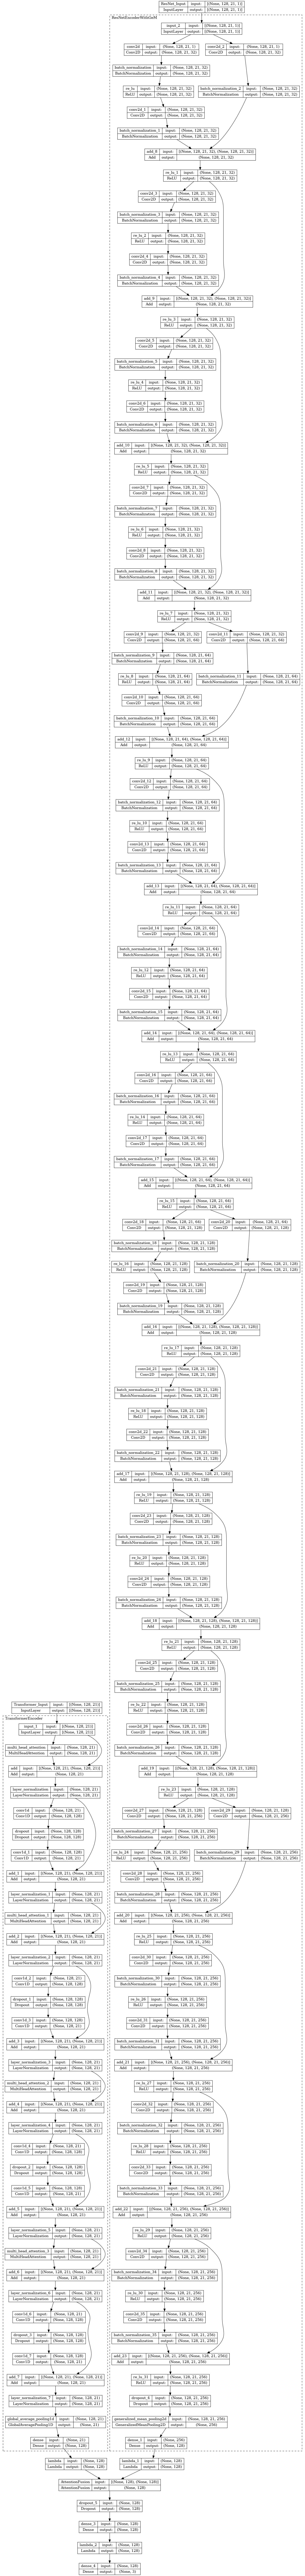

In [29]:
from tensorflow.keras.utils import plot_model

# 모델 시각화
plot_model(
    dolg_model,                   # 학습에 사용된 모델
    to_file="model_plot.png",  # 저장할 파일 이름
    show_shapes=True,         # 각 레이어의 출력 텐서 모양 표시
    show_layer_names=True,    # 레이어 이름 표시
    expand_nested=True,       # 중첩된 모델 (서브모델) 시각화
    dpi=96                    # 해상도 설정
)

In [30]:
print(trainX_transformer.shape)
print(trainX_resnet.shape)

(1472, 128, 21)
(1472, 128, 21, 1)


In [31]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch, lr):
    if epoch < 5:
        return lr
    return lr * tf.math.exp(-0.05)  # 지수 감소

lr_scheduler = LearningRateScheduler(lr_schedule)

# ReduceLROnPlateau 설정
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # 검증 손실 기준으로 동작
    factor=0.5,          # 학습률 감소 비율 (50% 감소)
    patience = 5,          # 개선되지 않을 경우 5 Epoch 후 학습률 감소
    min_lr=1e-6          # 학습률의 하한선
)

# EarlyStopping 설정
early_stopping = EarlyStopping(
    monitor='val_loss',     # 검증 손실 기준으로 조기 종료
    patience=10,            # 개선되지 않을 경우 10 Epoch 후 종료
    restore_best_weights=True  # 가장 좋은 가중치로 복원
)

# # 클래스 가중치 계산
# class_weights = class_weight.compute_class_weight(
#     class_weight='balanced',
#     classes=np.unique(np.argmax(trainy_one_hot, axis=1)),
#     y=np.argmax(trainy_one_hot, axis=1)
# )

# class_weights = {i: w for i, w in enumerate(class_weights)}
# print("Class Weights:", class_weights)

# 콜백 리스트
callbacks = [early_stopping, reduce_lr, lr_scheduler]
# callbacks = [early_stopping, lr_scheduler]

# 모델 학습
history = dolg_model.fit(
    [trainX_transformer, trainX_resnet],  # 입력 데이터
    trainy_one_hot,                       # 레이블
    validation_data=([valX_transformer, valX_resnet],  # 입력 데이터
    valy_one_hot),                # 검증 데이터 비율
    epochs=50,                          # 최대 Epoch 수
    batch_size=12,                       # 배치 사이즈
    callbacks=callbacks,                  # 콜백 리스트 추가
#     class_weight=class_weights
)


Epoch 1/50


2025-01-19 12:07:19.981494: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:1021] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inDOLG_Model_with_L2_Norm/ResNetEncoderWithGeM/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2025-01-19 12:07:22.050323: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2025-01-19 12:07:24.797631: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb868a4f540 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-01-19 12:07:24.797697: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): CUDA GPU, Compute Capability 8.0
2025-01-19 12:07:24.797707: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): CUDA GPU, Compute Capability 8.0
2025-01-19 12:07:24.803010: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling M

123/123 [==============================] - 47s 125ms/step - loss: 0.0126 - accuracy: 0.9654 - val_loss: 0.0029 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/50
123/123 [==============================] - 8s 61ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 4.8754e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/50
123/123 [==============================] - 7s 60ms/step - loss: 0.0050 - accuracy: 0.9817 - val_loss: 0.0093 - val_accuracy: 0.9212 - lr: 0.0010
Epoch 4/50
123/123 [==============================] - 7s 60ms/step - loss: 0.0012 - accuracy: 0.9959 - val_loss: 2.5496e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/50
123/123 [==============================] - 7s 60ms/step - loss: 2.6906e-04 - accuracy: 1.0000 - val_loss: 1.6578e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/50
123/123 [==============================] - 8s 62ms/step - loss: 1.8580e-04 - accuracy: 1.0000 - val_loss: 1.2342e-04 - val_accuracy: 1.0000 - lr: 9.5123e-04
Epoch 7/50
123/123 [=========================

Epoch 50/50
123/123 [==============================] - 7s 59ms/step - loss: 3.2559e-05 - accuracy: 1.0000 - val_loss: 2.5503e-05 - val_accuracy: 1.0000 - lr: 8.1873e-07


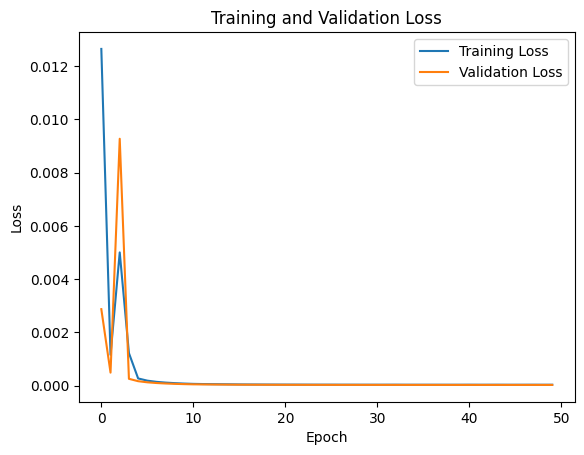

In [32]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

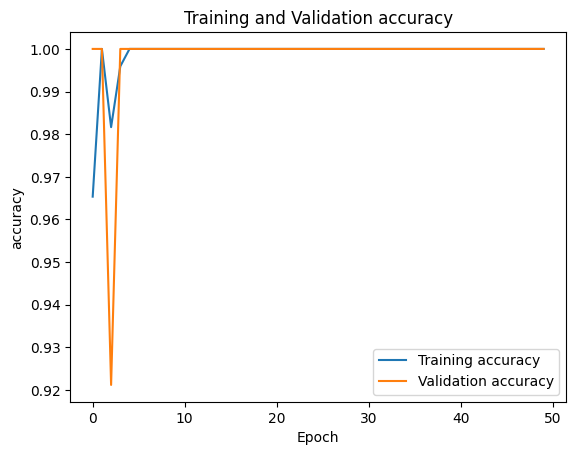

In [33]:
# Plot training and validation loss
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Training and Validation accuracy')
plt.show()

15/15 [==============================] - 3s 53ms/step
Classification Report:
                      precision    recall  f1-score   support

      Standing still       1.00      1.00      1.00       152
Sitting and relaxing       1.00      1.00      1.00       159
          Lying down       1.00      1.00      1.00       150

            accuracy                           1.00       461
           macro avg       1.00      1.00      1.00       461
        weighted avg       1.00      1.00      1.00       461

Test Accuracy: 1.00


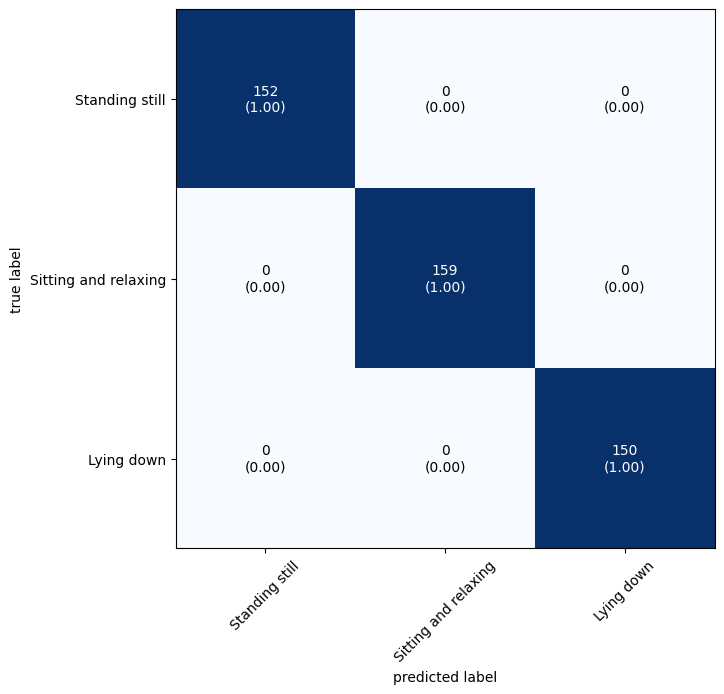

In [34]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# 예측 수행
predy = dolg_model.predict([testX_transformer, testX_resnet])
predy = np.argmax(predy, axis=-1)  # 가장 확률이 높은 클래스를 선택

# 테스트 라벨 (One-Hot Encoding → 정수형 라벨 변환)
testy = np.argmax(testy_one_hot, axis=-1)  # 테스트 레이블 변환

# 라벨 정의
LABELS = ['Standing still', 'Sitting and relaxing', 'Lying down']

# 혼동 행렬 생성
cm = confusion_matrix(testy, predy)

# 혼동 행렬 시각화
plot_confusion_matrix(conf_mat=cm, class_names=LABELS, show_normed=True, figsize=(7,7))

# 성능 보고서 출력
print("Classification Report:")
print(classification_report(testy, predy, target_names=LABELS))

# 정확도 출력
accuracy = accuracy_score(testy, predy)
print(f"Test Accuracy: {accuracy:.2f}")


In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))

[[152   0   0]
 [  0 159   0]
 [  0   0 150]]
1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       159
           2       1.00      1.00      1.00       150

    accuracy                           1.00       461
   macro avg       1.00      1.00      1.00       461
weighted avg       1.00      1.00      1.00       461

